# PROJETO 1 - Ciência dos Dados

Nome: João Guilherme de Araújo

## Introdução

Foram coletados três dados do site https://www.gapminder.org/:
1. Mortalidade infantil (Dead kids per woman)
2. Pelo menos uma fonte de água potável para a população, em geral (At least basic water source, overall)
3. IDH

Nesses *dataframes*, as linhas representam os países, as colunas representam o ano.

No *dataframe* *mortalidade infantil* criado a seguir, o conteúdo de cada célula é a medida de mortalidade infantil de um determinado ano (coluna) para determinado país (linha). 

No *dataframe* *distribuição água* criado a seguir, o conteúdo de cada célula é a medida de distribuição de água potável de um determinado ano (coluna) para um determinado país (linha). 

No *dataframe* *IDH* criado a seguir, o conteúdo de cada célula é a medida do índice de desenvolvimento humano de um determinado ano (coluna) para um determinado país (linha). 

O estudo é restringido a analisar o ano de **2000**.

##### Pergunta escolhida para a análise:
Existe uma relação entre a mortalidade infantil e distribuição de água potável para a população que influencie em um menor índice de desenvolvimento humano (IDH)?

A escolha da pergunta veio da hipótese de que um menor acesso à água potável na gestação e nos primeiros meses de vida pudesse influenciar numa taxa de mortalidade infantil maior e com isso diminuir o índice de desenvolvimento humano (IDH) uma vez que o cuidado e o bom desenvolvimento da população recém nascida é fundamental para uma infância saudável e um bem estar da população em geral.

### Leitura dos arquivos

In [276]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
mortalidade = pd.read_excel('dead_kids_per_woman.xlsx')
basicwater = pd.read_excel('at_least_basic_water_source_overall_access_percent.xlsx')
idh = pd.read_excel('hdi_human_development_index.xlsx')

### Mudanças de índices e renomeações

In [278]:
idh_2000 = idh.loc[:, ["geo", 2000]]
mortalidade_2000 = mortalidade.loc[:, ["geo", 2000]]
basicwater_2000 = basicwater.loc[:, ["geo", 2000]]

In [279]:
idh_2000.rename(columns={"geo":"Country"},inplace=True)
idh_idx=idh_2000.set_index("Country")
mortalidade_2000.rename(columns={"geo":"Country"},inplace=True)
mortalidade_idx=mortalidade_2000.set_index("Country")
basicwater_2000.rename(columns={"geo":"Country"},inplace=True)
basicwater_idx=basicwater_2000.set_index("Country")

idh_idx.rename(columns={2000:"IDH"},inplace=True)
mortalidade_idx.rename(columns={2000:"Mortalidade Infantil"},inplace=True)
basicwater_idx.rename(columns={2000:"Distribuição água"},inplace=True)

# IDH

In [280]:
idh_idx.head()

,IDH
Country,
Afghanistan,0.340
Albania,0.662
Algeria,0.644
Andorra,NaN
Angola,0.391


# Mortalidade Infantil

In [281]:
mortalidade_idx.head()

,Mortalidade Infantil
Country,
Afghanistan,2.810
Albania,0.127
Algeria,0.217
Angola,2.480
Argentina,0.140


# Distribuição mínima de água potável

In [282]:
basicwater_idx.head()

,Distribuição água
Country,
Afghanistan,27.1
Albania,87.6
Algeria,89.8
Andorra,100.0
Angola,37.8


# Join

In [283]:
df=idh_idx.join(mortalidade_idx, how="inner", lsuffix="_IDH", rsuffix="_Mortalidade")
df.head()

,IDH,Mortalidade Infantil
Country,,
Afghanistan,0.340,2.810
Albania,0.662,0.127
Algeria,0.644,0.217
Angola,0.391,2.480
Argentina,0.771,0.140


In [284]:
data=df.join(basicwater_idx, how="inner")

In [285]:
data.rename(index=str, columns={2000:"2000_Distribuicao"})
data.dropna()

,IDH,Mortalidade Infantil,Distribuição água
Country,,,
Afghanistan,0.340,2.8100,27.1
Albania,0.662,0.1270,87.6
Algeria,0.644,0.2170,89.8
Angola,0.391,2.4800,37.8
Argentina,0.771,0.1400,99.0
Armenia,0.644,0.0981,95.9
Australia,0.899,0.0562,99.7
Austria,0.837,0.0525,100.0
Azerbaijan,0.642,0.2190,76.4


# Gráficos de dispersão

## Distribuição de água X Mortalidade Infantil

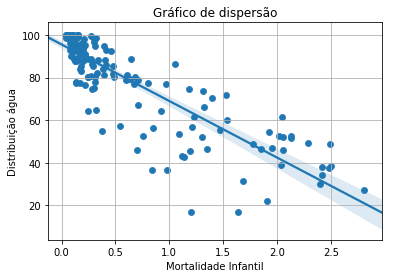

In [286]:
data.plot.scatter(x="Mortalidade Infantil", y="Distribuição água")
plt.title("Gráfico de dispersão")
plt.grid(True)
sns.regplot(data["Mortalidade Infantil"],data["Distribuição água"]);

In [287]:
data.loc[:,["Mortalidade Infantil","Distribuição água"]].corr()

,Mortalidade Infantil,Distribuição água
Mortalidade Infantil,1.000000,-0.860405
Distribuição água,-0.860405,1.000000


## Mortalidade Infantil X IDH

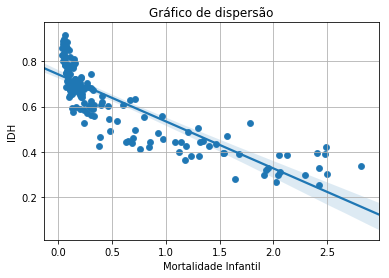

In [288]:
data.plot.scatter(x="Mortalidade Infantil", y="IDH")
plt.title("Gráfico de dispersão")
plt.grid(True)
sns.regplot(data["Mortalidade Infantil"],data.IDH);

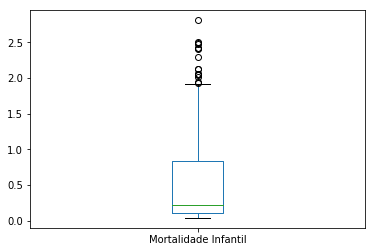

In [289]:
data["Mortalidade Infantil"].plot.box(logy=False);

#### A quantidade de outliers é também demonstrada abaixo pela função subscribe que mostra a média dos países em que a maioria se mostra com bons índices, no entanto, o valor máximo mostra que existem outros países com pontos fora da curva.

In [290]:
data["Mortalidade Infantil"].describe()

count    178.000000
mean       0.582563
std        0.702001
min        0.038400
25%        0.103250
50%        0.218500
75%        0.832000
max        2.810000
Name: Mortalidade Infantil, dtype: float64

In [291]:
data.loc[:,["Mortalidade Infantil","IDH"]].corr()

,Mortalidade Infantil,IDH
Mortalidade Infantil,1.000000,-0.846595
IDH,-0.846595,1.000000


## Distribuição de água X IDH

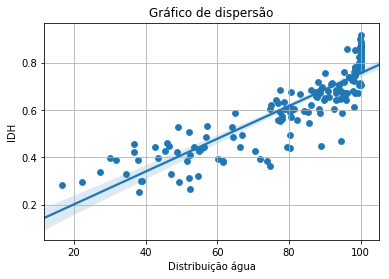

In [292]:
data.plot.scatter(x="Distribuição água", y="IDH")
plt.title("Gráfico de dispersão")
plt.grid(True)
sns.regplot(data["Distribuição água"],data.IDH);

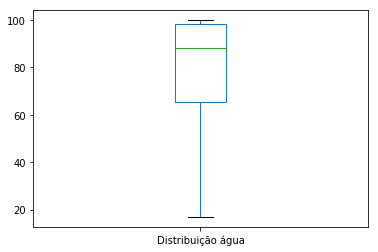

In [293]:
data["Distribuição água"].plot.box(logy=False);

In [294]:
data.loc[:,["Distribuição água","IDH"]].corr()

,Distribuição água,IDH
Distribuição água,1.000000,0.876976
IDH,0.876976,1.000000


# Conclusão

Conforme observado no primeiro gráfico de dispersão com linha de tendência há uma relação positiva entre as duas variáveis usadas no estudo pois estas se mostram na diagonal do gráfico, porém, com pontos dispersos para os países com baixa distribuição de água ou alto índice de mortalidade infantil, depois observa-se no coeficiente de correlação de postos de Spearman, que determina forte relação quando o valor obtido é entre 1 e -1, um valor de aproximadamente -0,860 o que deixa a associação entre as duas variáveis muito provável mas esta torna-se mais relevante para países com baixa mortalidade e alta distribuição de água como obeservado no canto superior esquerdo do gráfico. Com a observação das correlações entre o Índice de Desenvolvimento Humano (IDH) e as duas outras variáveis tendo em vista que as duas obtiveram gráficos de dispersão alinhados com a hipótese inicial e também valores, segundo o coeficiente de correlação de postos de Spearman, entre 0,84 e 0,88 em módulo é possível afirmar com base nos dados que há uma associação positiva forte entre as três variáveis.

Com isso pode-se concluir após análise dos dados que, como a hipótese sugeria, há uma correlação entre as duas variáveis escolhidas para estudo e o IDH que resultou em um pior resultou IDH no ano pesquisado (2000) e que a má distribuição de água afeta em grande parte dos casos no índice de mortalidade infantil.

O estudo dos dados mostra que deve-se melhorar o desenvolvimento tanto no amparo de recém nascidos quanto em uma melhor distribuição de água potável para a população principalmente nos países mal posicionados no ranking mostrado abaixo.

In [295]:
data.sort_values(by="IDH").head(20)

,IDH,Mortalidade Infantil,Distribuição água
Country,,,
Niger,0.255,2.42,38.0
Burundi,0.268,2.02,52.4
Ethiopia,0.283,1.64,16.7
Mali,0.297,2.29,49.2
Mozambique,0.298,1.91,22.2
Chad,0.300,2.04,39.0
Sierra Leone,0.302,2.50,38.7
Central African Republic,0.314,2.06,52.1
Guinea,0.322,1.93,54.5
